Import required modules and load data file

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv

In [3]:
data = pd.read_table(r'C:\Users\siddh\Downloads\ML\fruit_data_with_colors.txt')

In [4]:
data.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [28]:
data.nunique()

fruit_label       4
fruit_name        4
fruit_subtype    10
mass             40
width            24
height           28
color_score      27
dtype: int64

In [33]:
data.fruit_name.unique()


array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [16]:
lookup_fruit_name = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

create train-test split

In [5]:
x= data[['mass','width','height']]
y= data['fruit_label']

x_train , x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [6]:
x_train.shape

(44, 3)

In [38]:
x_test.shape

(15, 3)

In [39]:
x_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


In [40]:
y_test

26      orange
35      orange
43       lemon
28      orange
11       apple
2        apple
34      orange
46       lemon
40      orange
22       apple
4     mandarin
10       apple
30      orange
41      orange
33      orange
Name: fruit_name, dtype: object

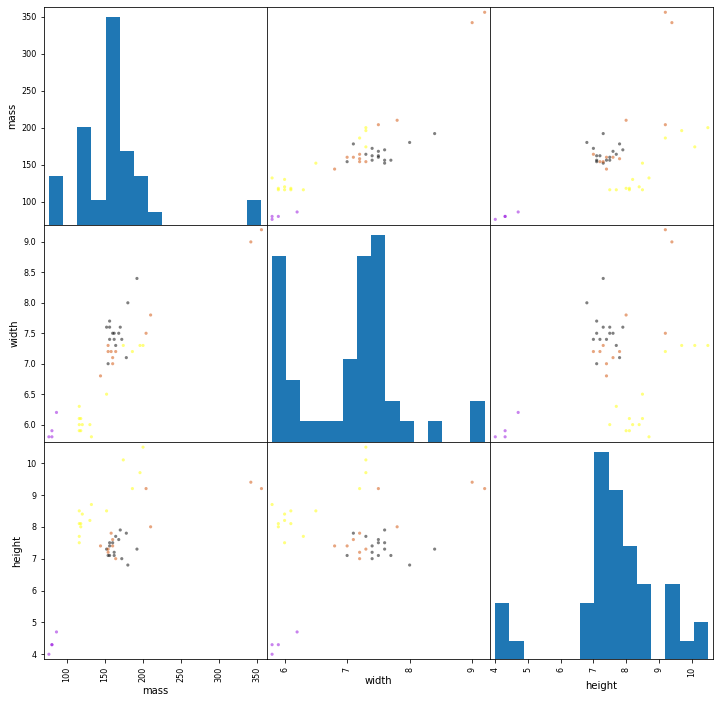

In [11]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_train, c= y_train,  s=40, hist_kwds={'bins':15},figsize=(12,12), cmap=cmap)


create classifier object

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors= 5)

train the classifer (fit the estimator) using the training data

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

Estimate the accuracy of the classifier on the future data, using the test data

In [20]:
knn.score(x_test, y_test)

0.5333333333333333

use the trained k-NN classifier model toclassify new, previously unseen objects

In [21]:
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

c:\Users\siddh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'